In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as miss

In [2]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Self-Supervised

In [3]:
data = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/new kyle n volve/final_dataset1.xlsx")

In [4]:
data.corr()

,Hours Online,Av. WHT (Deg C),Av. WHP (bar),Av. DHT (Deg C),Av. DHP (bar),Oil (m3),Gas (m3)
Hours Online,1.000000,0.038322,-0.012139,-0.001345,-0.012641,0.014646,0.021777
Av. WHT (Deg C),0.038322,1.000000,0.110724,0.148604,0.439847,0.378402,0.389250
Av. WHP (bar),-0.012139,0.110724,1.000000,-0.050466,0.186864,0.234115,0.479100
Av. DHT (Deg C),-0.001345,0.148604,-0.050466,1.000000,0.711326,0.514545,0.047176
Av. DHP (bar),-0.012641,0.439847,0.186864,0.711326,1.000000,0.500374,0.188639
Oil (m3),0.014646,0.378402,0.234115,0.514545,0.500374,1.000000,0.658231
Gas (m3),0.021777,0.389250,0.479100,0.047176,0.188639,0.658231,1.000000


In [5]:
data = data[(data['Av. DHP (bar)'] != 0) & (data['Av. DHP (bar)'] != 0) ]
data = data[(data['Av. DHP (bar)'] > -273)]
data = data[(data['Av. WHT (Deg C)'] >= 0)]
data = data[(data['Oil (m3)'] != 0) & (data['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data, "Av. DHT (Deg C)")
data = data[(data['Av. DHP (bar)'] > press_lower) & (data['Av. DHP (bar)'] < press_upper)]
data = data[(data['Av. DHT (Deg C)'] > temp_lower) & (data['Av. DHT (Deg C)'] < temp_upper)]

In [6]:
bin_count = int(np.ceil(np.log2(len(data['Hours Online']))) + 1)

Hours Online

<AxesSubplot:xlabel='Hours Online'>

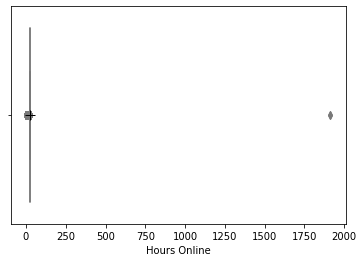

In [7]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

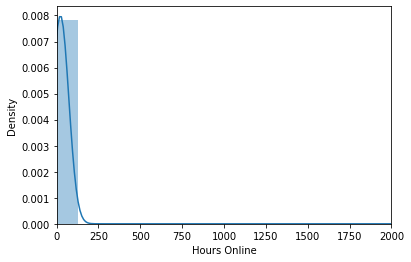

In [8]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
ax.set_xlim(0,2000)
plt.show() 
# plt.savefig('kde distribution fitting for hrs_online.png')

<AxesSubplot:xlabel='Hours Online', ylabel='Count'>

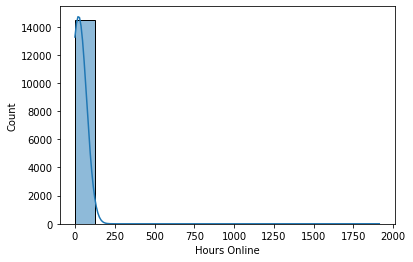

In [9]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

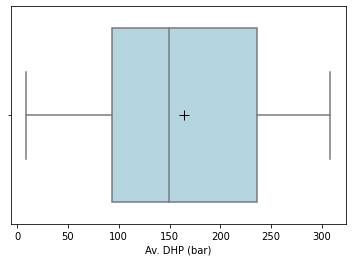

In [10]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

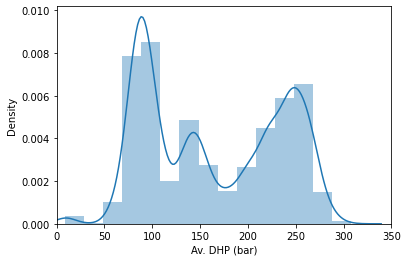

In [11]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
ax.set_xlim(0,350)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

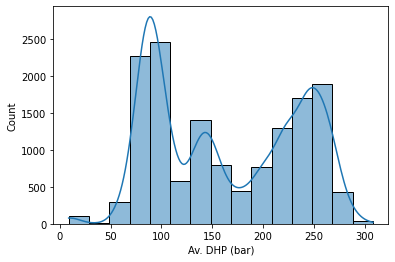

In [12]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

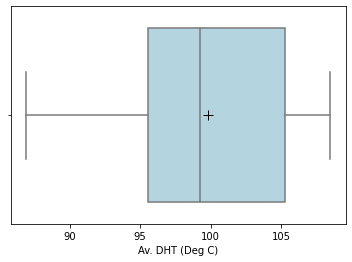

In [13]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')

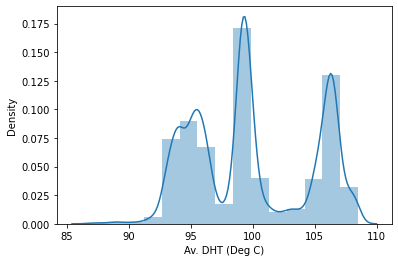

In [14]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHT (Deg C)', ylabel='Count'>

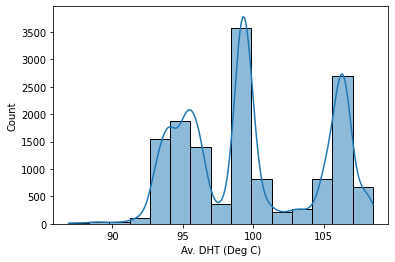

In [15]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

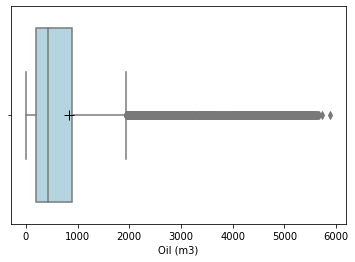

In [16]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for oil.png')

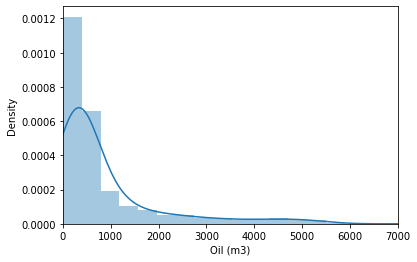

In [17]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,7000)
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 4000.0)

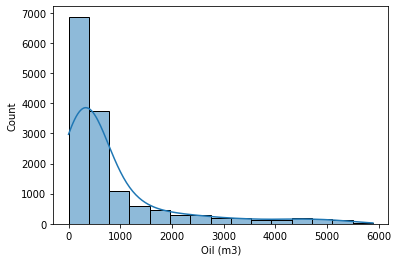

In [18]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,4000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

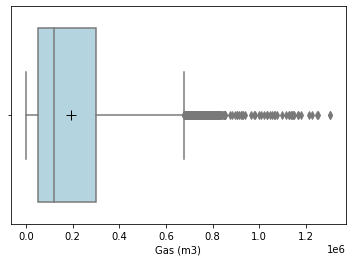

In [19]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

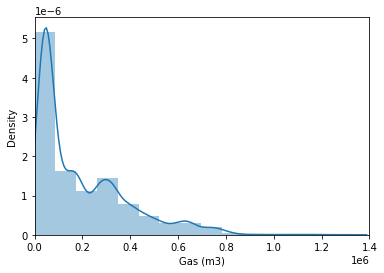

In [20]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
ax.set_xlim(0,1400000)
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

(0.0, 1200000.0)

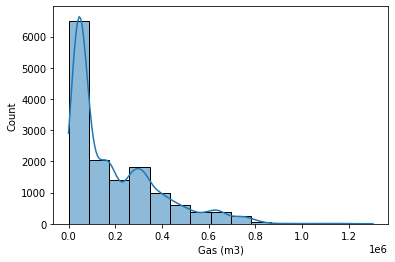

In [21]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
ax.set_xlim(0,1200000)
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

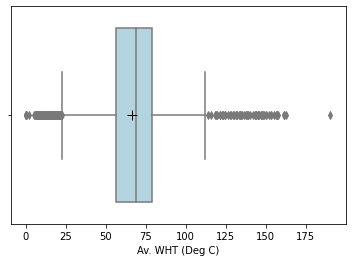

In [22]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press.png')

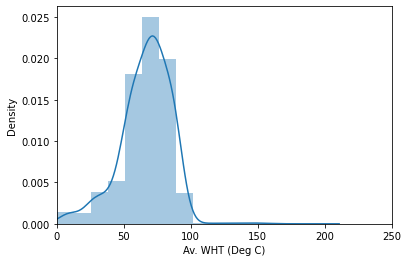

In [23]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,250)

# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

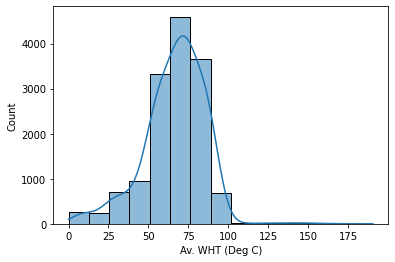

In [24]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

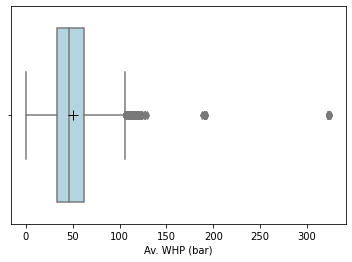

In [25]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')

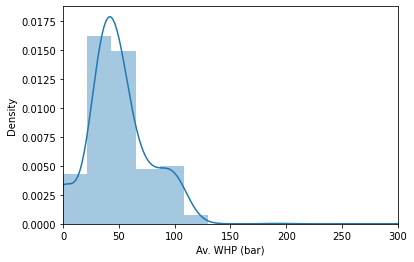

In [26]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

(0.0, 300.0)

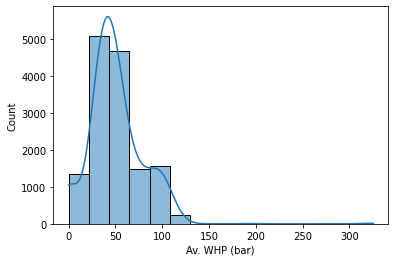

In [27]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,300)
# plt.savefig('histogram for whp press kyle.png')

# Forward Filling

In [28]:
data = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/another volve n kyle/ff_dataset.xlsx")

In [29]:
data.corr()

,Hours Online,Av. DHT (Deg C),Av. DHP (bar),Av. WHP (bar),Av. WHT (Deg C),Oil (m3),Gas (m3)
Hours Online,1.000000,-0.005961,-0.016999,-0.009962,0.039001,0.014657,0.021764
Av. DHT (Deg C),-0.005961,1.000000,-0.053359,-0.083554,0.393742,0.508601,0.127715
Av. DHP (bar),-0.016999,-0.053359,1.000000,0.410435,0.173425,0.102801,0.248927
Av. WHP (bar),-0.009962,-0.083554,0.410435,1.000000,0.056739,0.178748,0.398106
Av. WHT (Deg C),0.039001,0.393742,0.173425,0.056739,1.000000,0.378624,0.402268
Oil (m3),0.014657,0.508601,0.102801,0.178748,0.378624,1.000000,0.660833
Gas (m3),0.021764,0.127715,0.248927,0.398106,0.402268,0.660833,1.000000


In [30]:
data = data[(data['Av. DHP (bar)'] != 0) & (data['Av. DHP (bar)'] != 0) ]
data = data[(data['Av. DHP (bar)'] > -273)]
data = data[(data['Av. WHT (Deg C)'] >= 0)]
data = data[(data['Oil (m3)'] != 0) & (data['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data, "Av. DHT (Deg C)")
data = data[(data['Av. DHP (bar)'] > press_lower) & (data['Av. DHP (bar)'] < press_upper)]
data = data[(data['Av. DHT (Deg C)'] > temp_lower) & (data['Av. DHT (Deg C)'] < temp_upper)]

In [31]:
bin_count = int(np.ceil(np.log2(len(data['Hours Online']))) + 1)

Hours Online

<AxesSubplot:xlabel='Hours Online'>

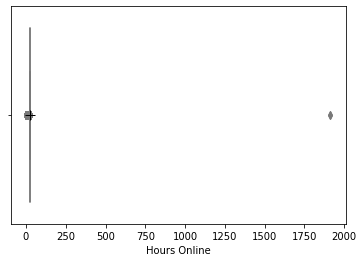

In [32]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

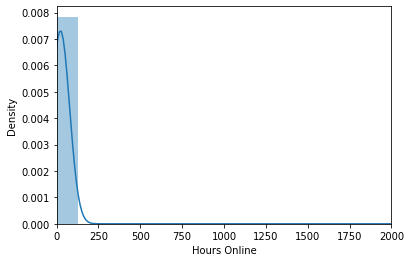

In [33]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
ax.set_xlim(0,2000)
# plt.savefig('kde distribution fitting for hrs_online.png')
plt.show() 

<AxesSubplot:xlabel='Hours Online', ylabel='Count'>

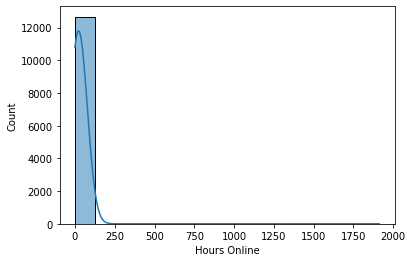

In [34]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

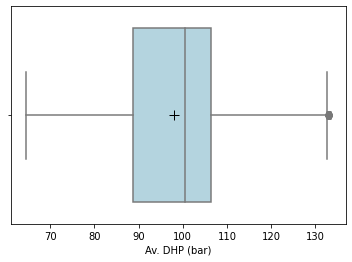

In [35]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

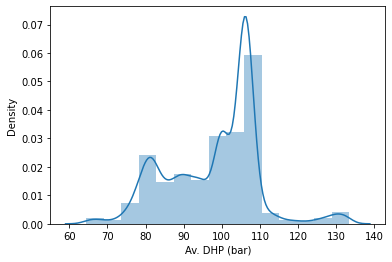

In [36]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

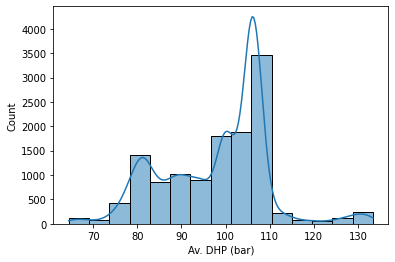

In [37]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

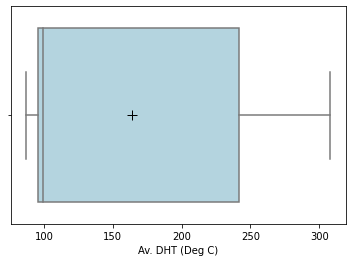

In [38]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')

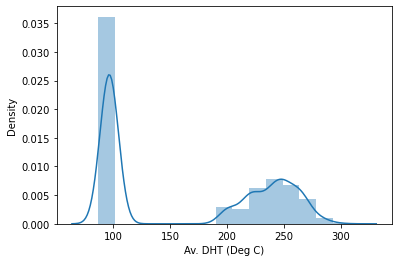

In [39]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHT (Deg C)', ylabel='Count'>

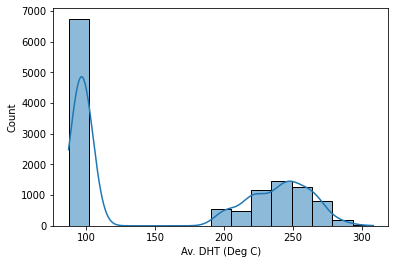

In [40]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

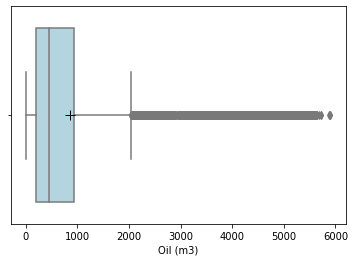

In [41]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for oil.png')

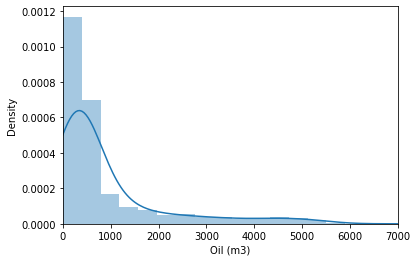

In [42]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,7000)
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 7000.0)

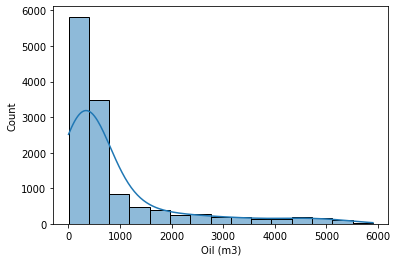

In [43]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,7000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

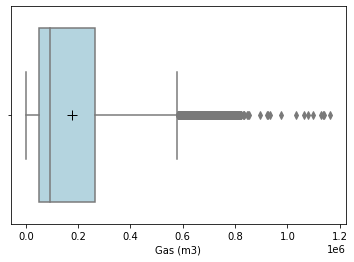

In [44]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

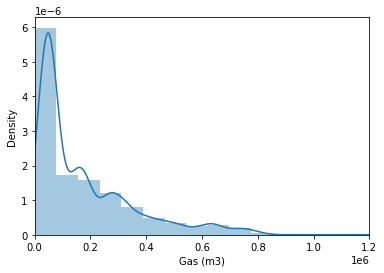

In [45]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
ax.set_xlim(0,1200000)
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

<AxesSubplot:xlabel='Gas (m3)', ylabel='Count'>

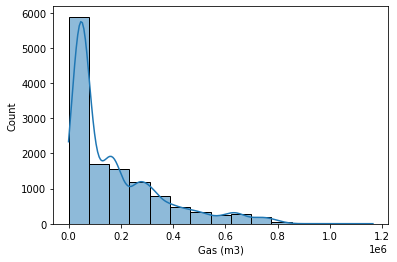

In [46]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

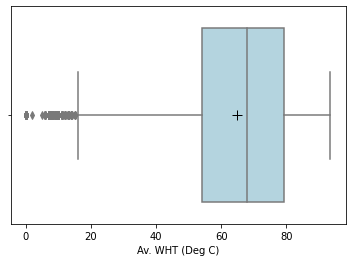

In [47]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press.png')

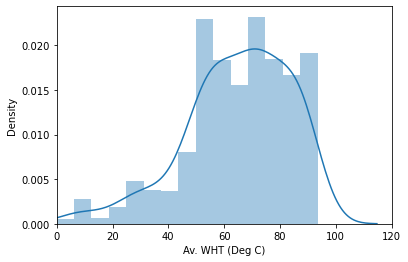

In [48]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,120)

# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

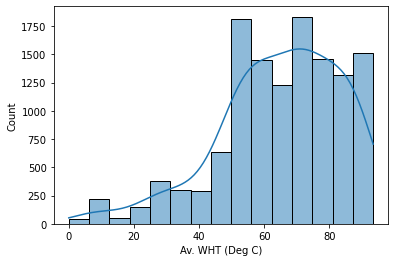

In [49]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

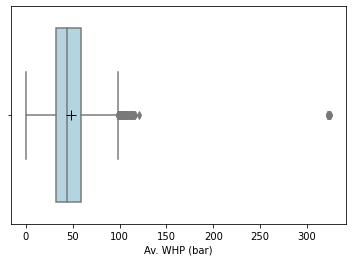

In [50]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')

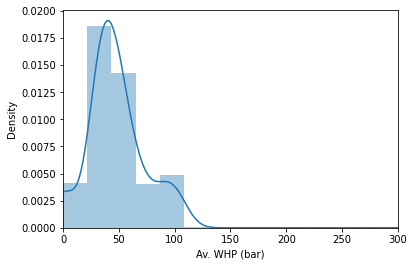

In [51]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHP (bar)', ylabel='Count'>

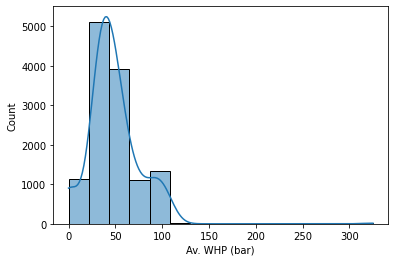

In [52]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press kyle.png')

# Median Imputation

In [53]:
data = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/another volve n kyle/MI_dataset1.xlsx")

In [54]:
data.corr()

,Hours Online,Av. DHT (Deg C),Av. DHP (bar),Av. WHP (bar),Av. WHT (Deg C),Oil (m3),Gas (m3)
Hours Online,1.000000,-0.005921,-0.016760,-0.011979,0.037860,0.014635,0.021824
Av. DHT (Deg C),-0.005921,1.000000,-0.052689,-0.008803,0.397433,0.509143,0.128837
Av. DHP (bar),-0.016760,-0.052689,1.000000,0.530258,0.184415,0.103975,0.250948
Av. WHP (bar),-0.011979,-0.008803,0.530258,1.000000,0.116496,0.240258,0.480545
Av. WHT (Deg C),0.037860,0.397433,0.184415,0.116496,1.000000,0.379450,0.396973
Oil (m3),0.014635,0.509143,0.103975,0.240258,0.379450,1.000000,0.660736
Gas (m3),0.021824,0.128837,0.250948,0.480545,0.396973,0.660736,1.000000


In [55]:
data = data[(data['Av. DHP (bar)'] != 0) & (data['Av. DHP (bar)'] != 0) ]
data = data[(data['Av. DHP (bar)'] > -273)]
data = data[(data['Av. WHT (Deg C)'] >= 0)]
data = data[(data['Oil (m3)'] != 0) & (data['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data, "Av. DHT (Deg C)")
data = data[(data['Av. DHP (bar)'] > press_lower) & (data['Av. DHP (bar)'] < press_upper)]
data = data[(data['Av. DHT (Deg C)'] > temp_lower) & (data['Av. DHT (Deg C)'] < temp_upper)]

Hours Online

<AxesSubplot:xlabel='Hours Online'>

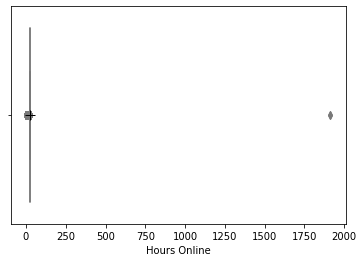

In [56]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

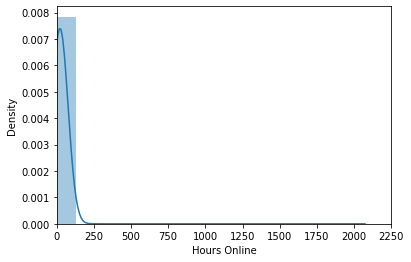

In [57]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
ax.set_xlim(0,2250)
# plt.savefig('kde distribution fitting for hrs_online.png')
plt.show() 

(0.0, 2250.0)

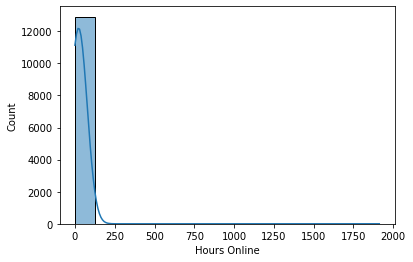

In [58]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
ax.set_xlim(0,2250)
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

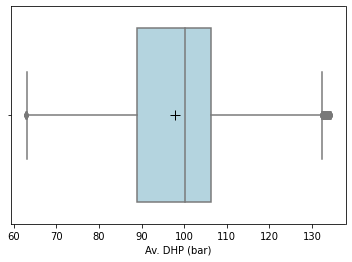

In [59]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

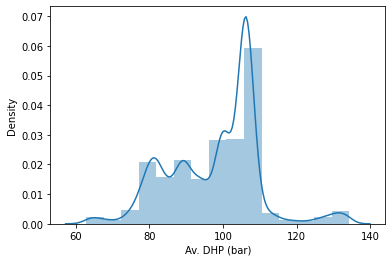

In [60]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

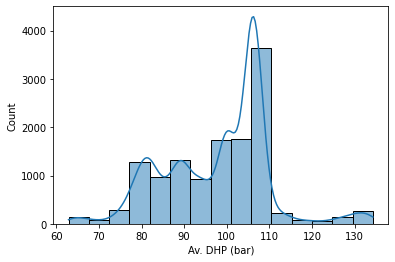

In [61]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

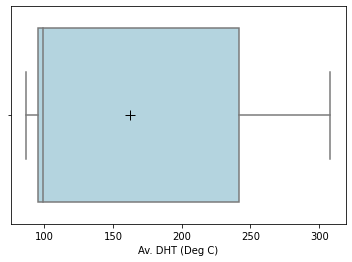

In [62]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')


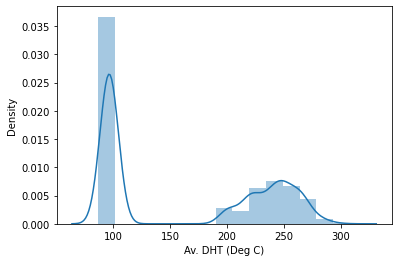

In [63]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

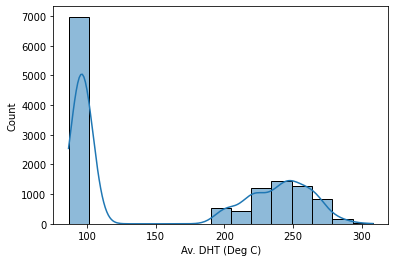

In [64]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
ax.set_xticks(range(85,120,5))
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

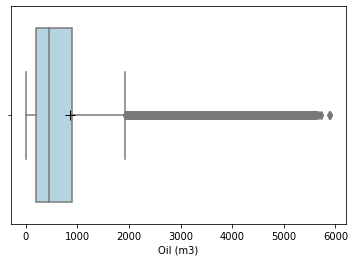

In [65]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for oil.png')

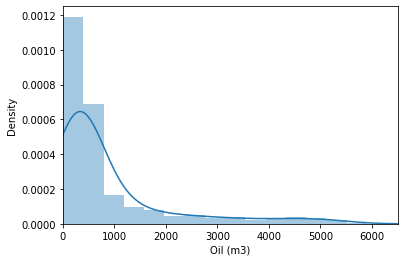

In [66]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,6500)
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 6000.0)

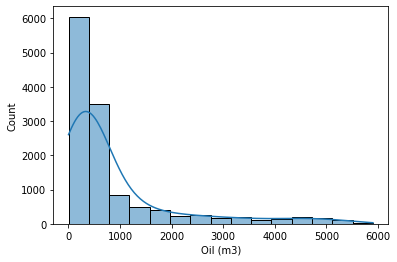

In [67]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,6000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

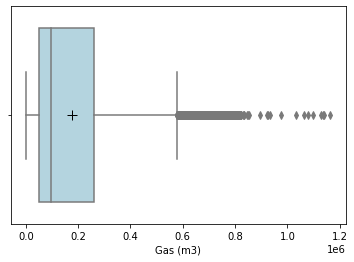

In [68]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

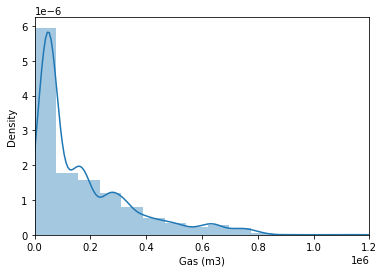

In [69]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
ax.set_xlim(0,1200000)
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

<AxesSubplot:xlabel='Gas (m3)', ylabel='Count'>

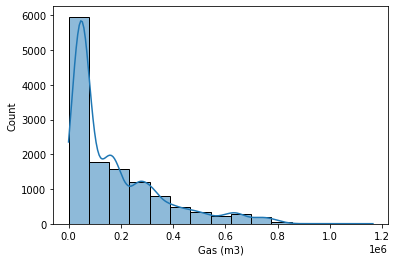

In [70]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

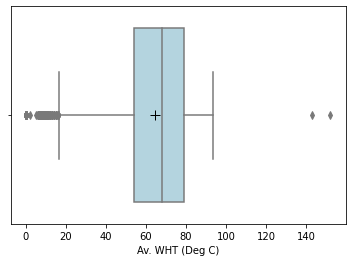

In [71]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for whp press.png')

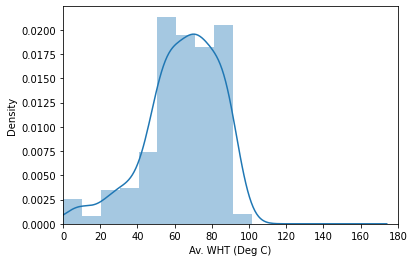

In [72]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,180)
# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

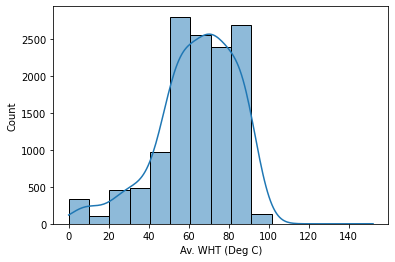

In [73]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

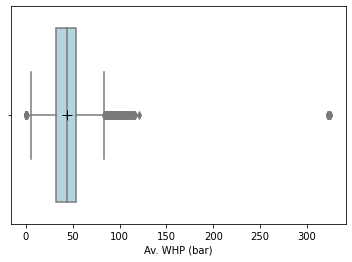

In [74]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')

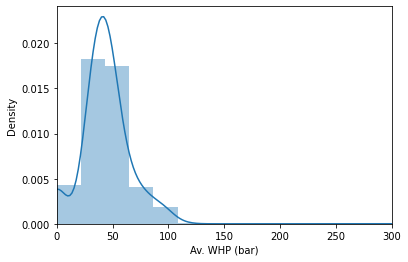

In [75]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHP (bar)', ylabel='Count'>

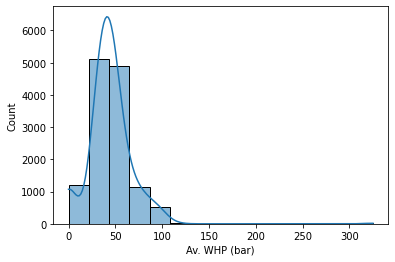

In [76]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press kyle.png')